# Notebook Nr.06
On nous demande de télécharger la structure de bande de phonons du matériau qui vous a été attribué et de calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin.

In [14]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.phonon.bandstructure import PhononBandStructure
from pymatgen.phonon.plotter import PhononBSPlotter

from scipy import constants
import matplotlib.pyplot as plt
import numpy as np

In [15]:
assigned_ID = "mp-7173"
chemical_formula = "ScSbPt"

with MPRester("L41ZHCirMyRASy8QHJEO") as myCristal:
    
    bs = myCristal.get_phonon_bandstructure_by_material_id(assigned_ID)

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



### 1. Affichage de la structure de bande de phonons
On récupère la structure de bande de phonons du matériau qui nous a été attribué. L'affichage permet de vérifier qu'on a bien récupéré les bonnes données.

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

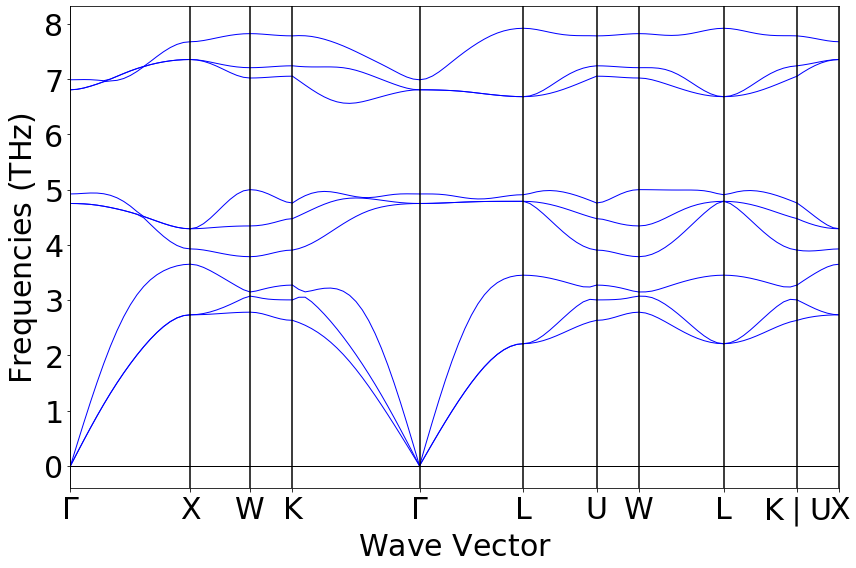

In [16]:
ph_bands_plot = PhononBSPlotter(bs)
ph_bands_plot.get_plot()

### 2. Calcul des vitesses du son
On définit la vitesse de propagation à partir de la dérivée de la relation de dispersion sur la fréquence $\omega _{q}$ : $$\frac{\partial \omega _{q}}{\partial q}$$
On va considérer que cette fréquence est linéaire selon le vecteur d'onde $q$ et ce pour des petites valeurs de ce vecteur d'onde. Dès lors, la détermination de la vitesse du son dans un solide suivante cette hypothèse revient à déterminer la pente de la fréquence $\omega _{q}$.

In [17]:
my_phonon_data = ph_bands_plot.bs_plot_data() 
        # https://github.com/materialsproject/pymatgen/blob/v2022.3.24/pymatgen/phonon/plotter.py#L301-L332
        # => Informations sur la structure retournée par cette fonction bs_plot_data().

frequencies = my_phonon_data.get('frequency') # Fréquences associées
ticks       = my_phonon_data.get('ticks')
distances   = my_phonon_data.get('distances') # Vecteurs d'ondes associés

label       = ticks.get('label')              # Directions

In [23]:
# Choix arbitraire des directions et branches accoustiques considérées :
accoustic_branch = [1,2,5]
brillouin_direct = [0,1,4]

# Vecteurs d'ondes et fréquences associées :
q_selected_1 = distances[brillouin_direct[0]] ; f_selected_1 = frequencies[brillouin_direct[0]][accoustic_branch[0]]
q_selected_2 = distances[brillouin_direct[1]] ; f_selected_2 = frequencies[brillouin_direct[1]][accoustic_branch[1]]
q_selected_3 = distances[brillouin_direct[2]] ; f_selected_3 = frequencies[brillouin_direct[2]][accoustic_branch[2]]


def sound_slope(frequency, wave_vector, gradient):
    """
    @params: fréquences, vecteurs d'onde associés et leurs dérivées pour une direction de la zone de Brillouin et une branche accoustique de 
             cette direction choisies.
    @return: pente de la vitesse du son associée aux fréquences et vecteurs d'onde pour une direction de la zone de Brillouin
             et une branche accoustique de cette direction choisies.
    """
    # Documentation sur les fonctions utilisées :
    #    https://numpy.org/doc/stable/reference/generated/numpy.add.html?highlight=add#numpy.add
    #    https://numpy.org/doc/stable/reference/generated/numpy.multiply.html?highlight=multiply#numpy.multiply
    a = np.multiply(wave_vector,gradient[-1]) ; b = np.add((-1)*np.multiply(wave_vector[-1],gradient[-1]),frequency[-1])
    return np.add(a,b)

def estimate_sound_speed(slope,spacing_value):
    """
    @params: pente de la vitesse du son associée aux fréquences et vecteurs d'ondes pour une direction de la zone de Brillouin 
             et une branche accoustique de cette direction choisies, et le pas entre les vecteurs d'onde associés.       
    @return: estimation linéaire de la vitesse du son associée aux fréquences et vecteurs d'ondes pour une direction de la zone 
             de Brillouin et une branche accoustique de cette direction choisies.
    """   
    conversion_factor = 10**12 * 10**(-10) # On standardise les unités utilisée en [Hz] et en [m]
    return ((slope[-1] - slope[1]) * conversion_factor)/spacing_value

### Première direction : X - W
La première branche accoustique est considérée.

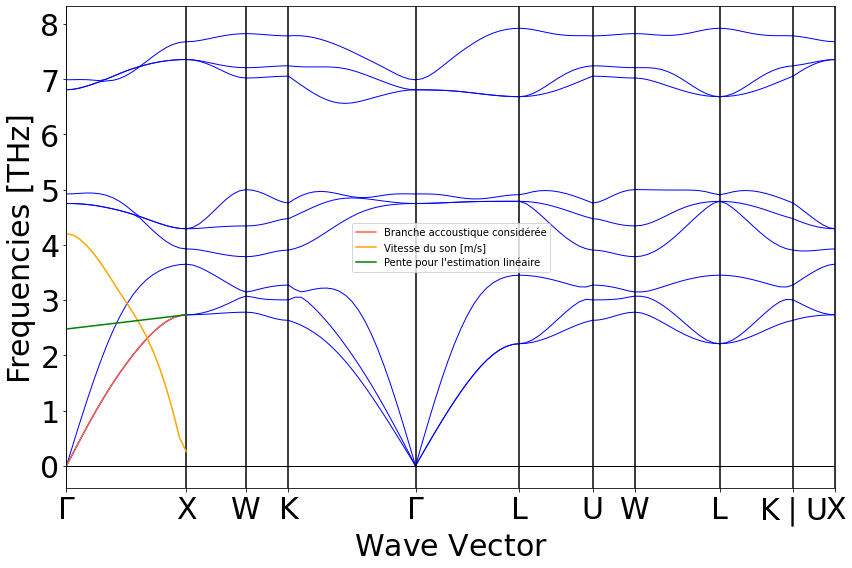

In [24]:
ph_bands_plot.get_plot()

spacing_value_1 = q_selected_1[1] - q_selected_1[0]
gradient_1      = np.gradient(f_selected_1,spacing_value_1) # https://numpy.org/doc/stable/reference/generated/numpy.gradient.html
sound_slope_1   = sound_slope(f_selected_1,q_selected_1,gradient_1)

plt.plot(q_selected_1, f_selected_1, color='tomato', label="Branche accoustique considérée")
plt.plot(q_selected_1, gradient_1, color='orange', label="Vitesse du son [m/s]")
plt.plot(q_selected_1, sound_slope_1, color='green', label="Pente pour l'estimation linéaire")

plt.ylabel("Frequencies [THz]")
plt.legend() ; plt.show()

In [26]:
print("La vitesse du son estimée est donc de : ",abs(estimate_sound_speed(sound_slope_1,spacing_value_1))," [m/s]\n")

La vitesse du son estimée est donc de :  438.0068367734082  [m/s]



### Seconde direction : W - K
La seconde branche accoustique est considérée.

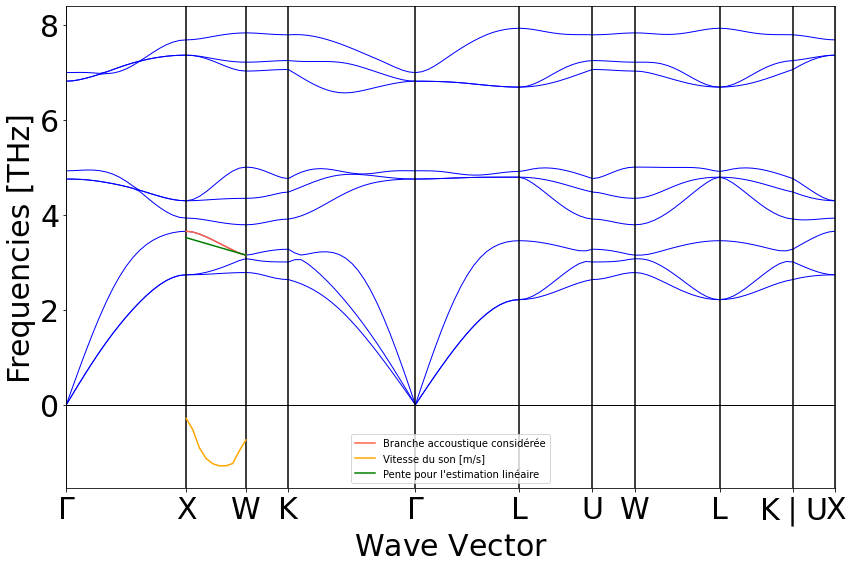

In [27]:
ph_bands_plot.get_plot()

spacing_value_2 = q_selected_2[1] - q_selected_2[0]
gradient_2      = np.gradient(f_selected_2,spacing_value_2) # https://numpy.org/doc/stable/reference/generated/numpy.gradient.html
sound_slope_2   = sound_slope(f_selected_2,q_selected_2,gradient_2)

plt.plot(q_selected_2, f_selected_2, color='tomato', label="Branche accoustique considérée")
plt.plot(q_selected_2, gradient_2, color='orange', label="Vitesse du son [m/s]")
plt.plot(q_selected_2, sound_slope_2, color='green', label="Pente pour l'estimation linéaire")

plt.ylabel("Frequencies [THz]")
plt.legend() ; plt.show()

In [29]:
print("La vitesse du son estimée est donc de : ",abs(estimate_sound_speed(sound_slope_2,spacing_value_2))," [m/s]\n")

La vitesse du son estimée est donc de :  591.4215080034969  [m/s]



### Troisième direction : L - U
La cinquième branche accoustique est considérée.

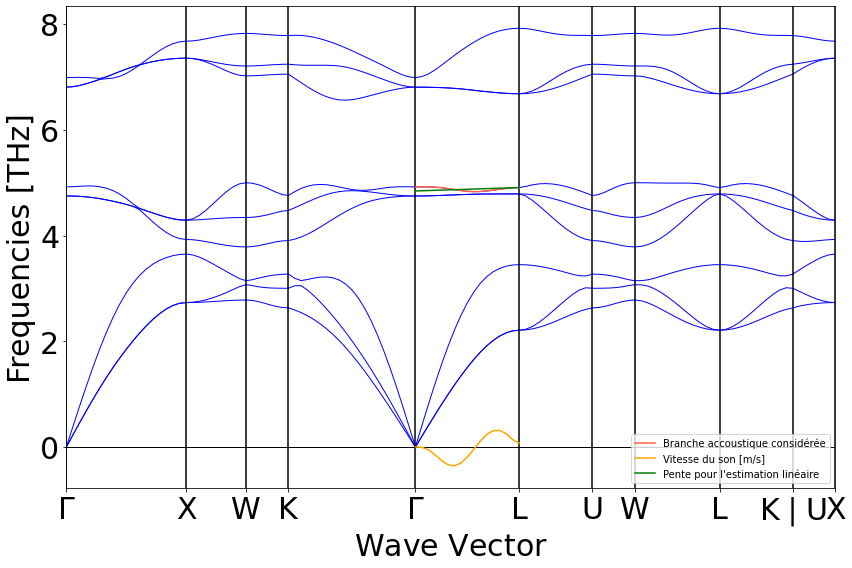

In [30]:
ph_bands_plot.get_plot()

spacing_value_3 = q_selected_3[1] - q_selected_3[0]
gradient_3      = np.gradient(f_selected_3,spacing_value_3) # https://numpy.org/doc/stable/reference/generated/numpy.gradient.html
sound_slope_3   = sound_slope(f_selected_3,q_selected_3,gradient_3)

plt.plot(q_selected_3, f_selected_3, color='tomato', label="Branche accoustique considérée")
plt.plot(q_selected_3, gradient_3, color='orange', label="Vitesse du son [m/s]")
plt.plot(q_selected_3, sound_slope_3, color='green', label="Pente pour l'estimation linéaire")

plt.ylabel("Frequencies [THz]")
plt.legend() ; plt.show()

In [31]:
print("La vitesse du son estimée est donc de : ",abs(estimate_sound_speed(sound_slope_3,spacing_value_3))," [m/s]\n")

La vitesse du son estimée est donc de :  111.13561798936406  [m/s]

